In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd ..

/home/jovyan


In [3]:
%run __init__.py

In [4]:
%run src/load_data.py

In [5]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

In [6]:
adult_train_data = data['adult']['train']['engineered']

In [7]:
whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
adult_test_data      DataFrame           age          workc<...>n[7490 rows x 14 columns]
adult_train_data     DataFrame           age  capital-gain <...>25071 rows x 103 columns]
madelon_test_data    DataFrame         0    1    2    3    <...>n[600 rows x 500 columns]
madelon_train_data   DataFrame          0    1    2    3   <...>[2000 rows x 500 columns]


In [8]:
whos Series

Variable               Type      Data/Info
------------------------------------------
adult_test_labels      Series    17198    1\n15457    0\n5<...>n21689    0\ndtype: int64
adult_train_labels     Series    26490    1\n6476     0\n2<...>n5800     0\ndtype: int64
madelon_test_labels    Series    0     -1\n1     -1\n2    <...>-1\nName: 0, dtype: int64
madelon_train_labels   Series    0      -1\n1      -1\n2  <...> 1\nName: 0, dtype: int64


In [115]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [116]:
X, y = load_iris(return_X_y=True)

ks = range(1,10)

kmeans_models = [KMeans(n_clusters = i, init="k-means++").fit(X) for i in ks]
gm_models = [GaussianMixture(n_components=i, covariance_type='full', random_state=0).fit(X) for i in ks]


In [117]:
km = kmeans_models[2]
gm = gm_models[3]

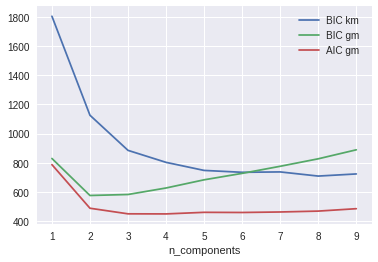

In [118]:
plt.plot(ks, [bic(kmeans_model, X) for kmeans_model in kmeans_models], label='BIC km')
plt.plot(ks, [m.bic(X) for m in gm_models], label='BIC gm ')
plt.plot(ks, [m.aic(X) for m in gm_models], label='AIC gm ')
plt.legend(loc='best')
plt.xlabel('n_components');